In [1]:
setwd('E:/notebook/miMatch')
library(ggplot2)
library(ggpubr)
library(cowplot)
library(stringr)
library(repr)

Warning message:
"package 'ggplot2' was built under R version 4.2.2"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend


Warning message:
"package 'stringr' was built under R version 4.2.2"


# differential taxa 

 Taxa         num       
 W1:10   Min.   : 0.00  
 W2:10   1st Qu.: 0.00  
 W3:10   Median : 3.00  
 W4:10   Mean   :19.72  
 W5:10   3rd Qu.:46.75  
         Max.   :50.00  

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


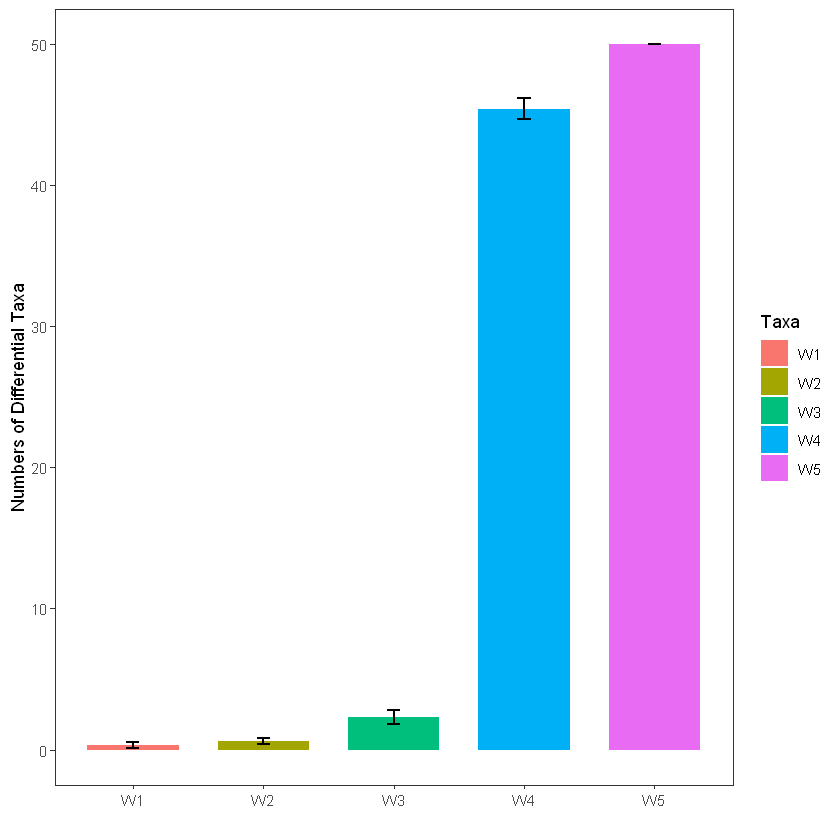

In [2]:
diffTaxa<-read.csv("simuData/differentialTaxa.csv",stringsAsFactors = F)
diffTaxa$Taxa<-factor(diffTaxa$Taxa)
summary(diffTaxa)
seData=aggregate(diffTaxa$num, 
                 by=list(Taxa=diffTaxa$Taxa),mean_se)
pdata<-data.frame(Taxa=seData$Taxa,
                  ymean=as.numeric(seData$x[,'y']),
                  ymin=as.numeric(seData$x[,'ymin']),
                  ymax=as.numeric(seData$x[,'ymax']) ) 

ggplot(pdata,aes(x=Taxa,y=ymean,fill=Taxa))+ 
  geom_bar(position="dodge", 
           stat="identity", 
           width = 0.7)+  
  geom_errorbar(aes(x = Taxa,ymin = ymin, ymax = ymax), 
                width = 0.1, 
                color = 'black',
                size=0.8)+ 
  xlab("")+ylab("Numbers of Differential Taxa")+
  theme_bw() + theme(panel.grid=element_blank())

# 1. differece between case vs. control

In [3]:
NE_NA_NS<-read.csv("simuData/NE_NA_NS_changed.csv",stringsAsFactors = F,row.names = 1)
path = "E:/notebook/miMatch/simuData"
fileName = dir(path)
sindex<-grep("SE_SA_SS_changed*",fileName)
sfileName = fileName[sindex]
hindex<-grep("HE_HA_HS_changed*",fileName)
hfileName = fileName[hindex]

In [4]:
sfilePath <- sapply(sfileName, function(x){ 
  paste(path,x,sep="/")})   
#list meta
data <- lapply(sfilePath, function(x){
  read.csv(x, header=T,row.names = 1)}) 
#list to dataframe
SE_SA_SS=data[[1]]
for (i in 2:length(data)) {
  SE_SA_SS<-rbind(SE_SA_SS,data[[i]])
}

hfilePath <- sapply(hfileName, function(x){ 
  paste(path,x,sep="/")})   

data <- lapply(hfilePath, function(x){
  read.csv(x, header=T,row.names = 1)})  

HE_HA_HS=data[[1]]
for (i in 2:length(data)) {
  HE_HA_HS<-rbind(HE_HA_HS,data[[i]])
}

#all data
data<-rbind(NE_NA_NS,SE_SA_SS,HE_HA_HS)
data$Group = rep( seq(from = 0, to = 0.2, by =0.02),each=50) 
data$Group<-factor(data$Group)
summary(data)

    Accuracy        Precision          Recall             F1        
 Min.   :0.4900   Min.   :0.4949   Min.   :0.8000   Min.   :0.6577  
 1st Qu.:0.5300   1st Qu.:0.5155   1st Qu.:0.9800   1st Qu.:0.6803  
 Median :0.7450   Median :0.6644   Median :1.0000   Median :0.7952  
 Mean   :0.7409   Mean   :0.7251   Mean   :0.9784   Mean   :0.8131  
 3rd Qu.:0.9500   3rd Qu.:0.9799   3rd Qu.:1.0000   3rd Qu.:0.9519  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
  psm.Accuracy    psm.Precision      psm.Recall         psm.F1      
 Min.   :0.1500   Min.   :0.2308   Min.   :0.3000   Min.   :0.2609  
 1st Qu.:0.9000   1st Qu.:0.9800   1st Qu.:0.8400   1st Qu.:0.8889  
 Median :0.9500   Median :1.0000   Median :0.9200   Median :0.9474  
 Mean   :0.8912   Mean   :0.9346   Mean   :0.8854   Mean   :0.8998  
 3rd Qu.:0.9700   3rd Qu.:1.0000   3rd Qu.:0.9800   3rd Qu.:0.9703  
 Max.   :1.0000   Max.   :1.0000  

In [5]:
#accuracy
AccData<-data.frame(Accuracy=c(data$Accuracy,data$psm.Accuracy),
                    Group=rep(c('Unmatched','Matched'),each=nrow(data)),
                    Difference=rep(data$Group,2)) 
AccData$Group<-factor(AccData$Group,levels = c('Unmatched','Matched'))
AccData$Difference<-factor(AccData$Difference)
#summary(AccData)
meanAccData=aggregate(AccData$Accuracy , 
            by=list(Group=AccData$Group,
                  Difference=AccData$Difference),mean)
seAccData=aggregate(AccData$Accuracy , 
                      by=list(Group=AccData$Group,
                              Difference=AccData$Difference),mean_se)
meanAccData$ymin<-as.numeric(seAccData$x[,'ymin']) 
meanAccData$ymax<-as.numeric(seAccData$x[,'ymax']) 
meanAccData

Group,Difference,x,ymin,ymax
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Unmatched,0,0.9616,0.9580965,0.9651035
Matched,0,0.9490,0.9424146,0.9555854
Unmatched,0.02,0.9688,0.9662343,0.9713657
Matched,0.02,0.9276,0.9162088,0.9389912
Unmatched,0.04,0.9654,0.9611988,0.9696012
Matched,0.04,0.9384,0.9274405,0.9493595
Unmatched,0.06,0.9260,0.9172682,0.9347318
Matched,0.06,0.9456,0.9351718,0.9560282
Unmatched,0.08,0.8298,0.8142384,0.8453616


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


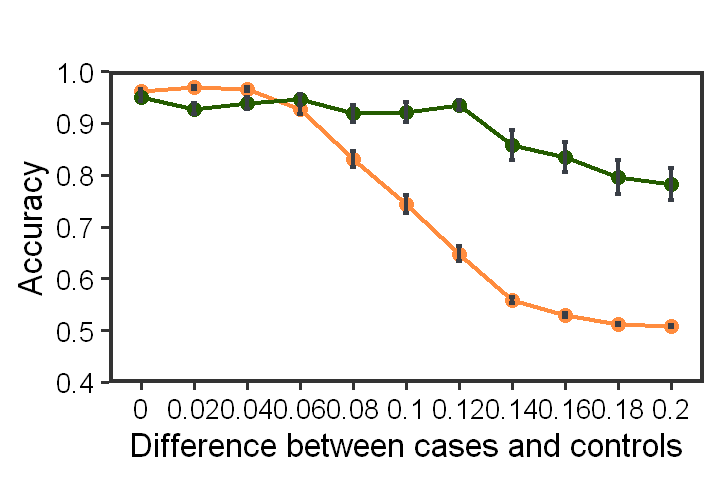

In [6]:
#summary(meanAccData)
options(repr.plot.width=6,repr.plot.height=4)
p<-ggplot(meanAccData,aes(factor(Difference),x,
                     color=Group,group=Group))+
      geom_line(cex=1.3)+
      geom_point(size=4)+
      geom_errorbar(aes(ymin=ymin, ymax=ymax),colour="#393E46", width=.1,size=1.3)+
      scale_y_continuous(limits = c(0.4,1),expand = c(0,0))+
      labs(title = "", y="Accuracy", x = "Difference between cases and controls")+
      scale_color_manual(values = c('#ff8c3e','#245c00'))+
      theme_test(base_size = 20)+
      theme(legend.position = 'none',
            panel.border = element_rect(size=2,fill = 'transparent'),
            axis.text = element_text(color='black'))
p
#pdf("./Results/Results1/diffAccuracy.pdf",width = 6,height = 4)
#p
#dev.off()

## boxplot

In [8]:
# No differece
Npdata<-AccData[which(AccData$Difference=='0'),]
p1<-ggplot(Npdata,aes(Group,Accuracy))+
  stat_summary(aes(fill = Group),fun="mean",geom = "bar",
               fun.args = list(mult=1),width=0.7)+
  scale_fill_manual(values = c("#FDBF6F","#33A02C"))+
  stat_summary(fun.data=mean_sdl,fun.args = list(mult=1),
               geom="errorbar",width=0.2)+
  stat_compare_means(label = "p.format",method = "wilcox.test")+
  geom_jitter(position = position_jitter(0.2),shape=21,
              size = 2,alpha=0.9)+
  labs(x = "",y = "Accuracy")+
  #scale_y_continuous(expand = c(0,0),limits = c(0,2))+
  theme_classic()+
  theme(panel.background=element_rect(fill="white",colour="black",size=0.25), 
        axis.line=element_line(colour="black",size=0.25), 
        axis.title=element_text(size=13,color="black"), 
        axis.text = element_text(size=12,color="black"), 
        legend.position="none") 

#0.1 difference
pdata1<-AccData[which(AccData$Difference=='0.1'),]
p2<-ggplot(pdata1,aes(Group,Accuracy))+
  stat_summary(aes(fill = Group),fun="mean",geom = "bar",
               fun.args = list(mult=1),width=0.7)+
  scale_fill_manual(values = c("#FDBF6F","#33A02C"))+
  stat_summary(fun.data=mean_sdl,fun.args = list(mult=1),
               geom="errorbar",width=0.2)+
  stat_compare_means(label = "p.format",method = "wilcox.test")+
  geom_jitter(position = position_jitter(0.2),shape=21,
              size = 2,alpha=0.9)+
  labs(x = "",y = "Accuracy")+
  #scale_y_continuous(expand = c(0,0),limits = c(0,2))+
  theme_classic()+
  theme(panel.background=element_rect(fill="white",colour="black",size=0.25), 
        axis.line=element_line(colour="black",size=0.25), 
        axis.title=element_text(size=13,color="black"), 
        axis.text = element_text(size=12,color="black"), 
        legend.position="none") # 不显示图例

# 0.2 difference
pdata2<-AccData[which(AccData$Difference=='0.2'),]
p3<-ggplot(pdata2,aes(Group,Accuracy))+
  stat_summary(aes(fill = Group),fun="mean",geom = "bar",
               fun.args = list(mult=1),width=0.7)+
  scale_fill_manual(values = c("#FDBF6F","#33A02C"))+
  stat_summary(fun.data=mean_sdl,fun.args = list(mult=1),
               geom="errorbar",width=0.2)+
  stat_compare_means(label = "p.format",method = "wilcox.test")+
  geom_jitter(position = position_jitter(0.2),shape=21,
              size = 2,alpha=0.9)+
  labs(x = "",y = "Accuracy")+
  #scale_y_continuous(expand = c(0,0),limits = c(0,2))+
  theme_classic()+
  theme(panel.background=element_rect(fill="white",colour="black",size=0.25), 
        axis.line=element_line(colour="black",size=0.25), 
        axis.title=element_text(size=13,color="black"), 
        axis.text = element_text(size=12,color="black"), 
        legend.position="none") 



Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


Warning message:
"The dot-dot notation (`..p.format..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(p.format)` instead."


png 
  2

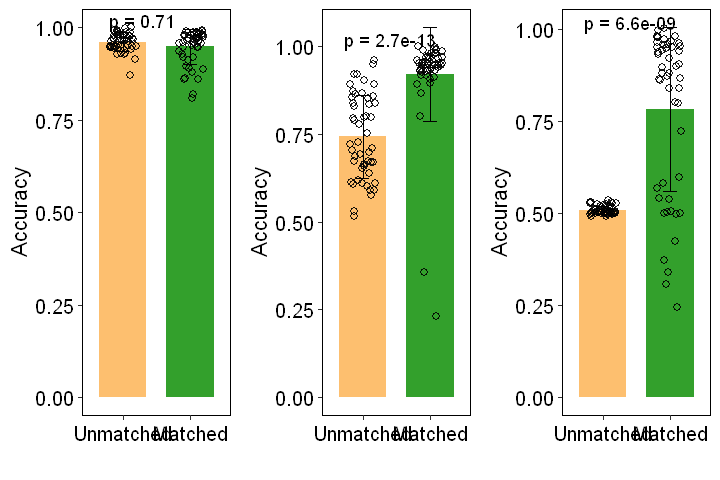

In [9]:
options(repr.plot.width=6,repr.plot.height=4)
p<-plot_grid(p1,p2,p3, nrow = 1, align = "v")
p
pdf("./Results/Results1/diffBoxPlot.pdf",width = 6,height = 4)
p
dev.off()

# 2. linear relationship 

In [16]:
lindex<-grep("LE_LA_LS_changed*",fileName)
lfileName = fileName[lindex]
#lfileName
lfilePath <- sapply(lfileName, function(x){ 
  paste(path,x,sep="/")})   
data <- lapply(lfilePath, function(x){
  read.csv(x, header=T,row.names = 1)})  
LE_LA_LS=data[[1]]
for (i in 2:length(data)) {
  LE_LA_LS<-rbind(LE_LA_LS,data[[i]])
}

#all data accuracy
LE_LA_LS$Relationship = rep( seq(from = 0.02, to = 0.1, by =0.02),each=50) 
AccLinear<-data.frame(Accuracy=c(LE_LA_LS$Accuracy,LE_LA_LS$psm.Accuracy),
                    Group=rep(c('Unmatched','Matched'),each=nrow(LE_LA_LS)),
                    Relationship=rep(LE_LA_LS$Relationship,2)) 
linear0<-AccData[which(AccData$Difference=='0.1'),1:2]
linear0$Relationship<-'0'
AccLinear<-rbind(linear0,AccLinear)

AccLinear$Group<-factor(AccLinear$Group,levels = c('Unmatched','Matched'))
AccLinear$Relationship<-factor(AccLinear$Relationship)
#summary(AccLinear)
meanAccLinear=aggregate(AccLinear$Accuracy , 
                      by=list(Group=AccLinear$Group,
                              Relationship=AccLinear$Relationship),mean_se)
meanAccLinear
x<-data.frame(ymean=as.numeric(meanAccLinear$x[,'y']),
              ymin=as.numeric(meanAccLinear$x[,'ymin']),
              ymax=as.numeric(meanAccLinear$x[,'ymax']))

meanAccLinear<-cbind(meanAccLinear[,1:2],x) 

Group,Relationship,x
<fct>,<fct>,"<list[,3]>"
Unmatched,0,"0.7434, 0.726522, 0.760278"
Matched,0,"0.9208, 0.9018052, 0.9397948"
Unmatched,0.02,"0.6402, 0.6252511, 0.6551489"
Matched,0.02,"0.8994, 0.8828843, 0.9159157"
Unmatched,0.04,"0.5672, 0.5605236, 0.5738764"
Matched,0.04,"0.9238, 0.9090065, 0.9385935"
Unmatched,0.06,"0.5274, 0.5234741, 0.5313259"
Matched,0.06,"0.8792, 0.8570856, 0.9013144"
Unmatched,0.08,"0.5094, 0.507676, 0.511124"


png 
  2

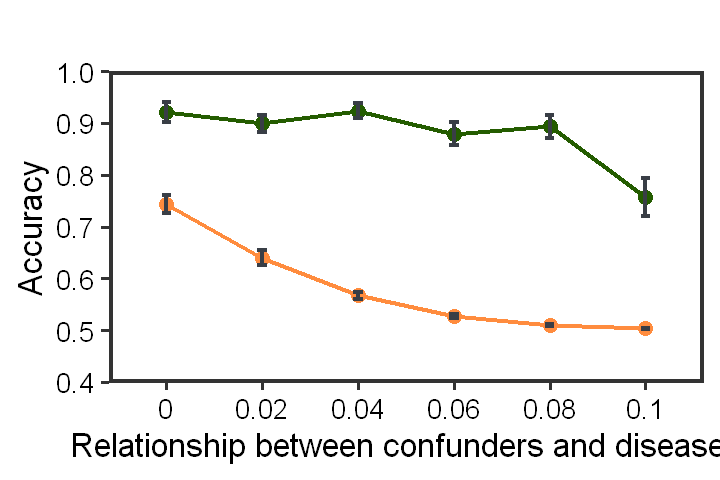

In [17]:
#summary(meanAccLinear)
options(repr.plot.width=6,repr.plot.height=4)
p<-ggplot(meanAccLinear,aes(Relationship,ymean,
                           color=Group,group=Group))+
      geom_line(cex=1.3)+
      geom_point(size=4)+
      geom_errorbar(aes(ymin=ymin, ymax=ymax),colour="#393E46", width=.1,size=1.3)+
      scale_y_continuous(limits = c(0.4,1),expand = c(0,0))+
      labs(title = "", y="Accuracy", x = "Relationship between confunders and diseases")+
      scale_color_manual(values = c('#ff8c3e','#245c00'))+
      theme_test(base_size = 20)+
      theme(legend.position = 'none',
            panel.border = element_rect(size=2,fill = 'transparent'),
            axis.text = element_text(color='black'))
p
pdf("./Results/Results1/LinearAccuracy.pdf",width = 6,height = 4)
p
dev.off()

In [12]:
Lpdata<-AccLinear[which(AccLinear$Relationship=='0.02'),] 
p4<-ggplot(Lpdata,aes(Group,Accuracy))+
  stat_summary(aes(fill = Group),fun="mean",geom = "bar",
               fun.args = list(mult=1),width=0.7)+
  scale_fill_manual(values = c("#FDBF6F","#33A02C"))+
  stat_summary(fun.data=mean_sdl,fun.args = list(mult=1),
               geom="errorbar",width=0.2)+
  stat_compare_means(label = "p.format",method = "wilcox.test")+
  geom_jitter(position = position_jitter(0.2),shape=21,
              size = 2,alpha=0.9)+
  labs(x = "",y = "Accuracy")+
  theme_classic()+
  theme(panel.background=element_rect(fill="white",colour="black",size=0.25), 
        axis.line=element_line(colour="black",size=0.25),
        axis.title=element_text(size=13,color="black"), 
        axis.text = element_text(size=12,color="black"), 
        legend.position="none") 

Lpdata2<-AccLinear[which(AccLinear$Relationship=='0.06'),] 
p5<-ggplot(Lpdata2,aes(Group,Accuracy))+
  stat_summary(aes(fill = Group),fun="mean",geom = "bar",
               fun.args = list(mult=1),width=0.7)+
  scale_fill_manual(values = c("#FDBF6F","#33A02C"))+
  stat_summary(fun.data=mean_sdl,fun.args = list(mult=1),
               geom="errorbar",width=0.2)+
  stat_compare_means(label = "p.format",method = "wilcox.test")+
  geom_jitter(position = position_jitter(0.2),shape=21,
              size = 2,alpha=0.9)+
  labs(x = "",y = "Accuracy")+
  theme_classic()+
  theme(panel.background=element_rect(fill="white",colour="black",size=0.25), 
        axis.line=element_line(colour="black",size=0.25), 
        axis.title=element_text(size=13,color="black"),
        axis.text = element_text(size=12,color="black"),
        legend.position="none")

Lpdata3<-AccLinear[which(AccLinear$Relationship=='0.1'),] 
p6<-ggplot(Lpdata3,aes(Group,Accuracy))+
  stat_summary(aes(fill = Group),fun="mean",geom = "bar",
               fun.args = list(mult=1),width=0.7)+
  scale_fill_manual(values = c("#FDBF6F","#33A02C"))+
  stat_summary(fun.data=mean_sdl,fun.args = list(mult=1),
               geom="errorbar",width=0.2)+
  stat_compare_means(label = "p.format",method = "wilcox.test")+
  geom_jitter(position = position_jitter(0.2),shape=21,
              size = 2,alpha=0.9)+
  labs(x = "",y = "Accuracy")+
  theme_classic()+
  theme(panel.background=element_rect(fill="white",colour="black",size=0.25), 
        axis.line=element_line(colour="black",size=0.25), 
        axis.title=element_text(size=13,color="black"),
        axis.text = element_text(size=12,color="black"), 
        legend.position="none") 



png 
  2

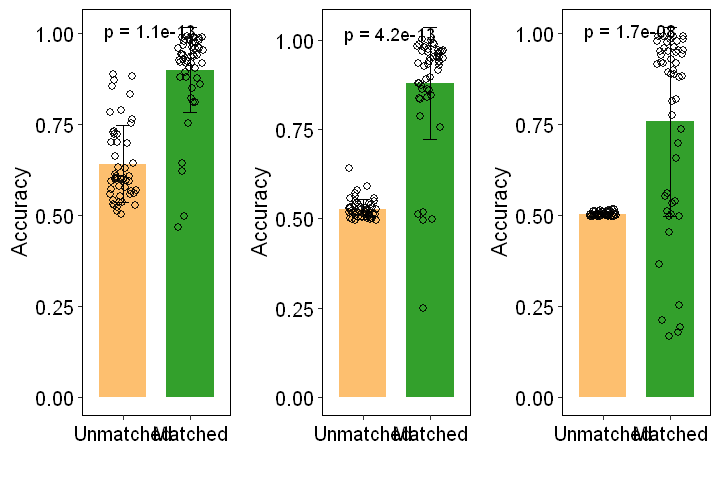

In [14]:
options(repr.plot.width=6,repr.plot.height=4)
p<-plot_grid(p4,p5,p6, nrow = 1, align = "v")
p
pdf("./Results/Results1/linearBoxplot.pdf",width = 6,height = 4)
p
dev.off()

# microbiomine abundence

[1] 0.5076882

[1] 1.509475


0.5-0.6 0.6-0.7 0.7-0.8 0.8-0.9 0.9-1.0 1.0-1.1 1.1-1.2 1.2-1.3 1.3-1.4 1.4-1.5 
    200     197     229     201     193     212     186     182     197     180 
1.5-1.6 
     23 

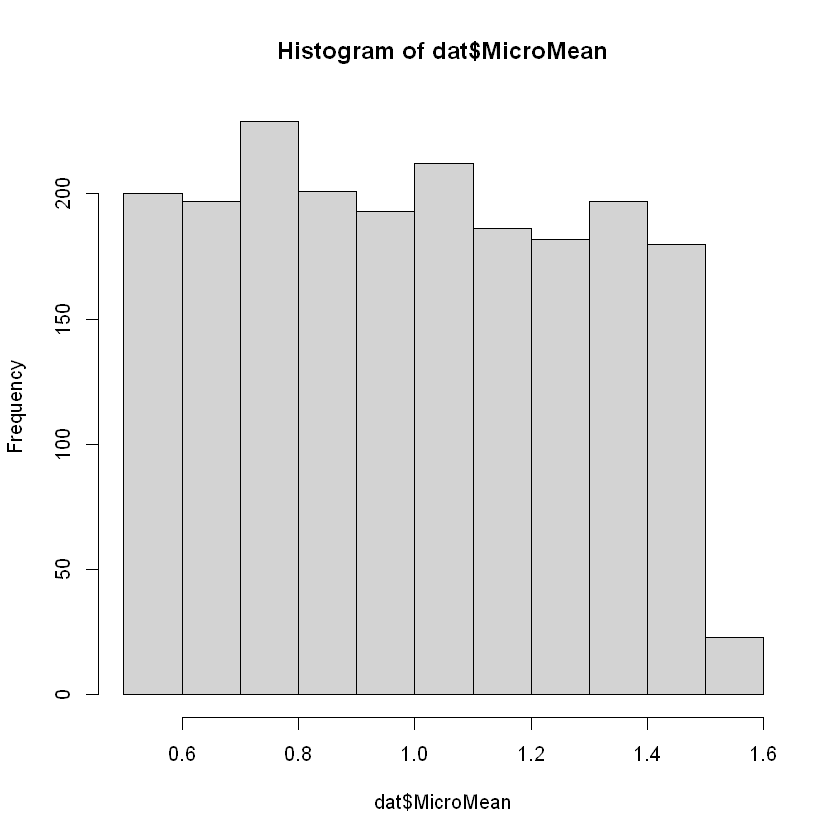

In [16]:
dat<-read.csv("simuData/abundence.csv",row.names = 1)
ph<-hist(dat$MicroMean)
min(dat$MicroMean)
max(dat$MicroMean)
dat$type="0.5-0.6"
dat$type[which(dat$MicroMean>0.6&dat$MicroMean<=0.7)]="0.6-0.7"
dat$type[which(dat$MicroMean>0.7&dat$MicroMean<=0.8)]="0.7-0.8"
dat$type[which(dat$MicroMean>0.8&dat$MicroMean<=0.9)]="0.8-0.9"
dat$type[which(dat$MicroMean>0.9&dat$MicroMean<=1)]="0.9-1.0"
dat$type[which(dat$MicroMean>1&dat$MicroMean<=1.1)]="1.0-1.1"
dat$type[which(dat$MicroMean>1.1&dat$MicroMean<=1.2)]="1.1-1.2"
dat$type[which(dat$MicroMean>1.2&dat$MicroMean<=1.3)]="1.2-1.3"
dat$type[which(dat$MicroMean>1.3&dat$MicroMean<=1.4)]="1.3-1.4"
dat$type[which(dat$MicroMean>1.4&dat$MicroMean<=1.5)]="1.4-1.5"
dat$type[which(dat$MicroMean>1.5)]="1.5-1.6"

table(dat$type)

No summary function supplied, defaulting to `mean_se()`


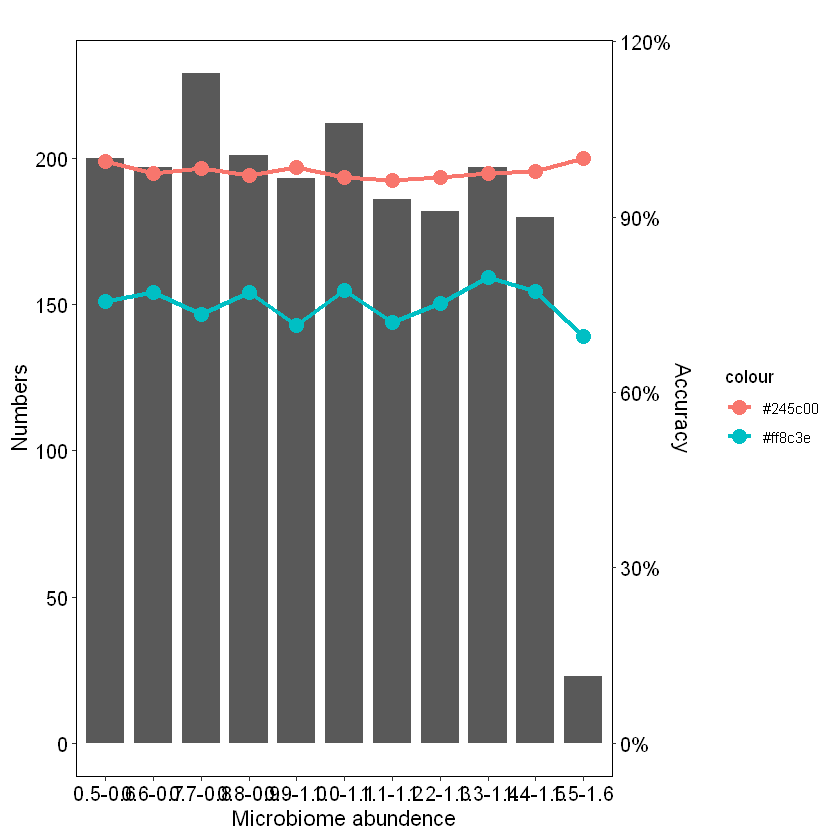

In [17]:
rAt=aggregate(dat$p.value.raw., by=list(type=dat$type),length)
#rDt=aggregate(rawDiffTax$p.value.raw., by=list(type=rawDiffTax$type),length)
dat=dat[order(dat$type),]
n=0
Astr=''
for (i in rAt$x) {
  tdata=dat[(n+1):(n+i),]
  n=n+i
  TrueDiffTax=rownames(tdata)[grep("W2",rownames(tdata))]
  TrueOtherTax=rownames(tdata)[grep("W1",rownames(tdata))]
  diffTax=rownames(tdata[which(tdata$p.value.raw.<0.05),])
  otherTax=setdiff(rownames(tdata),diffTax)
  TP=length(intersect(diffTax,TrueDiffTax))
  TN=length(intersect(otherTax,TrueOtherTax))
  FP=length(diffTax)-TP
  FN=length(otherTax)-TN
  Accuracy=(TP+TN)/(TP+FN+FP+TN)
  Astr=c(Astr,Accuracy)
}
rAt$rawAcc=as.numeric(Astr[-1]) 

n=0
Astr=''
for (i in rAt$x) {
  tdata=dat[(n+1):(n+i),]
  n=n+i
  TrueDiffTax=rownames(tdata)[grep("W2",rownames(tdata))]
  TrueOtherTax=rownames(tdata)[grep("W1",rownames(tdata))]
  diffTax=rownames(tdata[which(tdata$p.value.PSM.<0.05),])
  otherTax=setdiff(rownames(tdata),diffTax)
  TP=length(intersect(diffTax,TrueDiffTax))
  TN=length(intersect(otherTax,TrueOtherTax))
  FP=length(diffTax)-TP
  FN=length(otherTax)-TN
  Accuracy=(TP+TN)/(TP+FN+FP+TN)
  Astr=c(Astr,Accuracy)
}
rAt$PSMAcc=as.numeric(Astr[-1])
colnames(rAt)=c("type","Num","rawAcc","PSMAcc")

ggplot(rAt)+
  geom_bar(aes(x=type,y=Num),
           position=position_dodge(),
           stat="summary",
           width=0.8)+
  
  labs(title = "", y="Numbers", x = "Microbiome abundence")+
  scale_y_continuous(sec.axis=sec_axis(~./200, name="Accuracy", labels=scales::percent))+
  geom_point(aes(factor(type),rawAcc*200,
                 color='#ff8c3e'),
             size=4)+
  geom_line(aes(factor(type),rawAcc*200,
                color='#ff8c3e',group='#ff8c3e'),
            cex=1.3)+
  geom_point(aes(factor(type),PSMAcc*200,
                 color='#245c00'),
             size=4)+
  geom_line(aes(factor(type),PSMAcc*200,
                color='#245c00',group='#ff8c3e'),
            cex=1.3)+
  theme_classic()+
  theme(panel.background=element_rect(fill="white",colour="black",size=0.25), 
        axis.line=element_line(colour="black",size=0.25),
        axis.title=element_text(size=13,color="black"), 
        axis.text = element_text(size=12,color="black")) 


# disease weight 

In [7]:
Rdata<-read.csv("simuData/DiseaseWeight/Results.csv")
#colnames(Rdata)
pdata<-data.frame(DiseaseWeight=rep(Rdata$DiseaseWeight,2),
                  value=c(Rdata$rawDiffNum,Rdata$psmDiffNum),
                  group=rep(c("unmatched","matched"),each=80))


pdata$group<-factor(pdata$group,levels = c('unmatched','matched'))
#pdata$DiseaseWeight<-factor(pdata$DiseaseWeight)
summary(pdata)

 DiseaseWeight         value              group   
 Min.   :0.00100   Min.   :  0.00   unmatched:80  
 1st Qu.:0.00875   1st Qu.: 26.75   matched  :80  
 Median :0.03000   Median : 75.00                 
 Mean   :0.03950   Mean   : 61.71                 
 3rd Qu.:0.06500   3rd Qu.: 95.00                 
 Max.   :0.10000   Max.   :100.00                 

png 
  2

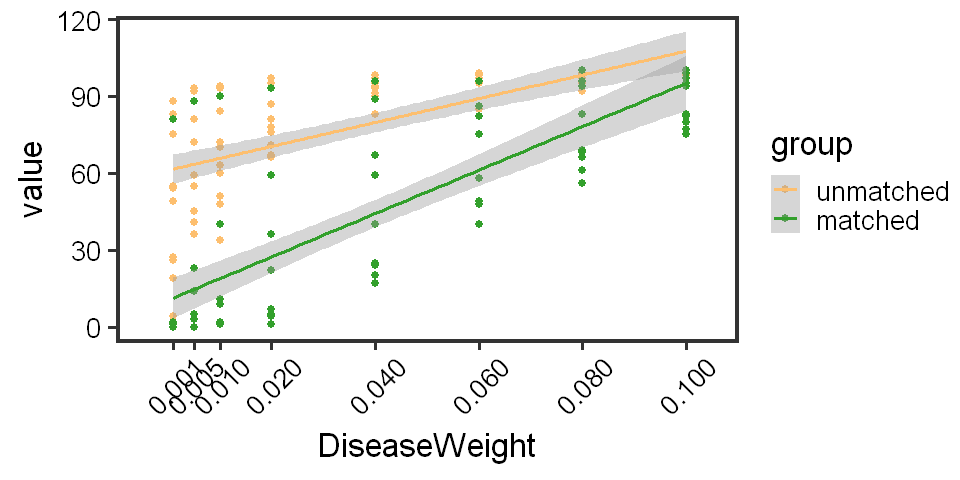

In [12]:
options(repr.plot.width=8,repr.plot.height=4)
p_dw<-ggplot(pdata, aes( x = DiseaseWeight, y = value, color = group)) +
          geom_point(size=2)+ 
          scale_color_manual(values = c("#FDBF6F","#33A02C"))+
          scale_x_continuous(limits = c(-0.01,0.11),
                             breaks = c(0.001,0.005,0.01,0.02,0.04,0.06,0.08,0.1),expand = c(0,0))+
          geom_smooth(method = 'lm', formula = y ~ x, se = T)+
          theme_test(base_size = 20)+
          theme(panel.border = element_rect(size=2,fill = 'transparent'),
                axis.text.x = element_text(angle = 45, vjust = 0.6),
                axis.text = element_text(color='black'))
p_dw
#pdf("./Results/Results1/DiseaseWeight1.pdf",width = 8,height = 4)
#p_dw
#dev.off()

In [13]:
meanAccLinear=aggregate(pdata$value , 
                        by=list(DiseaseWeight=pdata$DiseaseWeight,
                                group=pdata$group),mean_se)
x<-data.frame(ymean=as.numeric(meanAccLinear$x[,'y']),
              ymin=as.numeric(meanAccLinear$x[,'ymin']),
              ymax=as.numeric(meanAccLinear$x[,'ymax']))

meanAccLinear<-cbind(meanAccLinear[,1:2],x) 

png 
  2

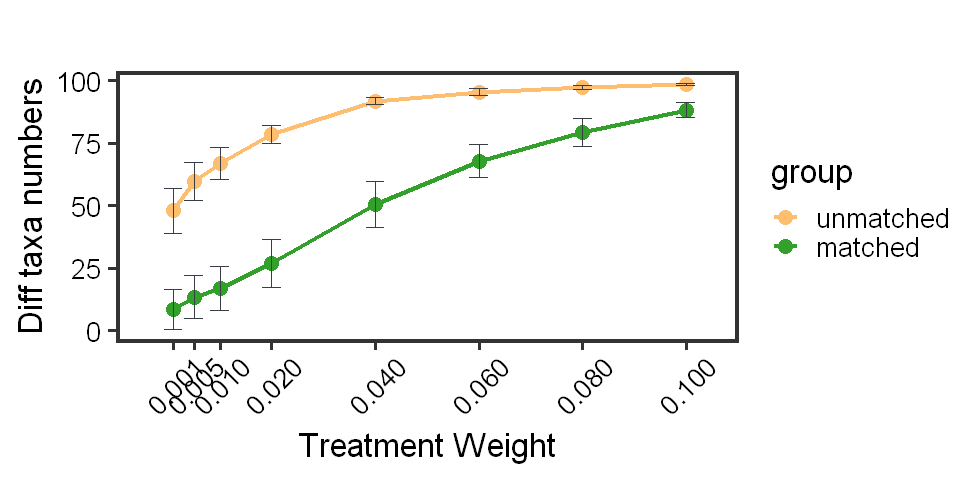

In [15]:
options(repr.plot.width=8,repr.plot.height=4)
p_dw<-ggplot(meanAccLinear,aes(DiseaseWeight,ymean,
                         color=group,group=group))+
      geom_line(cex=1.3)+
      geom_point(size=4)+
      geom_errorbar(aes(ymin=ymin, ymax=ymax),colour="#393E46", linewidth=0.2)+
      scale_x_continuous(limits = c(-0.01,0.11),
        breaks = c(0.001,0.005,0.01,0.02,0.04,0.06,0.08,0.1),expand = c(0,0))+
      labs(title = "", y="Diff taxa numbers", x = "Treatment Weight")+
      scale_color_manual(values = c("#FDBF6F","#33A02C"))+
      theme_test(base_size = 20)+
      theme(panel.border = element_rect(size=2,fill = 'transparent'),
            axis.text.x = element_text(angle = 45, vjust = 0.6),
            axis.text = element_text(color='black'))
p_dw
#pdf("./Results/Results1/DiseaseWeight2.pdf",width = 6,height = 4)
#p_dw
#dev.off()